# Data Visualization com Seaborn

## Setup

Import de bibliotecas e dados

In [4]:
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv('tips.csv')

In [6]:
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo dados

In [7]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [8]:
columns = {
    'total_bill': 'valor_da_conta',
    'tips': 'gorjeta',
    'day': 'dia_da_semana',
    'dessert': 'sobremesa',
    'time': 'hora_do_dia',
    'size': 'total_de_pessoas',
}

In [9]:
tips = df.rename(columns=columns)
tips

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [10]:
tips.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
dessert_strings = {
    'Yes': 'sim',
    'No': 'não',
}

In [12]:
tips.sobremesa.map(dessert_strings)

0      não
1      não
2      não
3      não
4      não
      ... 
239    não
240    sim
241    sim
242    não
243    não
Name: sobremesa, Length: 244, dtype: object

In [13]:
tips.sobremesa = tips.sobremesa.map(dessert_strings)
tips.head()

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Sun,Dinner,2
1,10.34,1.66,não,Sun,Dinner,3
2,21.01,3.50,não,Sun,Dinner,3
3,23.68,3.31,não,Sun,Dinner,2
4,24.59,3.61,não,Sun,Dinner,4


In [14]:
tips.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [15]:
days_of_week = {
    'Sun': 'Domingo',
    'Sat': 'Sabádo',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

In [16]:
tips.dia_da_semana = tips.dia_da_semana.map(days_of_week)
tips.head()

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Dinner,2
1,10.34,1.66,não,Domingo,Dinner,3
2,21.01,3.50,não,Domingo,Dinner,3
3,23.68,3.31,não,Domingo,Dinner,2
4,24.59,3.61,não,Domingo,Dinner,4


In [17]:
tips.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [18]:
schedules = {
    'Dinner': 'Janta',
    'Lunch': 'Almoço'
}

In [19]:
tips.hora_do_dia = tips.hora_do_dia.map(schedules)
tips.head()

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Janta,2
1,10.34,1.66,não,Domingo,Janta,3
2,21.01,3.50,não,Domingo,Janta,3
3,23.68,3.31,não,Domingo,Janta,2
4,24.59,3.61,não,Domingo,Janta,4


In [21]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, pandas, matplotlib, numpy
Required-by: missingno


# Análise 1 - Valor da conta e gorjeta

In [22]:
tips.columns

Index(['valor_da_conta', 'tip', 'sobremesa', 'dia_da_semana', 'hora_do_dia',
       'total_de_pessoas'],
      dtype='object')

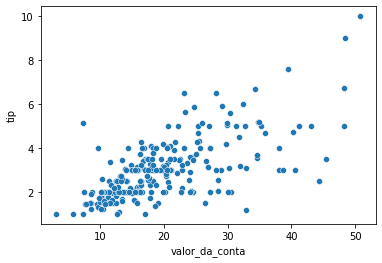

In [24]:
ax = sns.scatterplot(x='valor_da_conta', y='tip', data=tips)

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [26]:
print('A base de dados contém {} registros'.format(tips.shape[0]))

A base de dados contém 244 registros


In [28]:
print('Registros não nulos\n{}'.format(tips.count()))

Registros não nulos
valor_da_conta      244
tip                 244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64


## Criando o campo porcentagem

In [29]:
tips.head()

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,não,Domingo,Janta,2
1,10.34,1.66,não,Domingo,Janta,3
2,21.01,3.50,não,Domingo,Janta,3
3,23.68,3.31,não,Domingo,Janta,2
4,24.59,3.61,não,Domingo,Janta,4


In [30]:
tips['porcentagem'] = tips['tip'] / tips['valor_da_conta']

In [31]:
tips.head()

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Janta,2,0.059447
1,10.34,1.66,não,Domingo,Janta,3,0.160542
2,21.01,3.50,não,Domingo,Janta,3,0.166587
3,23.68,3.31,não,Domingo,Janta,2,0.139780
4,24.59,3.61,não,Domingo,Janta,4,0.146808


In [32]:
tips['porcentagem'] = tips['porcentagem'].round(2)

In [33]:
tips.head()

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Janta,2,0.06
1,10.34,1.66,não,Domingo,Janta,3,0.16
2,21.01,3.50,não,Domingo,Janta,3,0.17
3,23.68,3.31,não,Domingo,Janta,2,0.14
4,24.59,3.61,não,Domingo,Janta,4,0.15


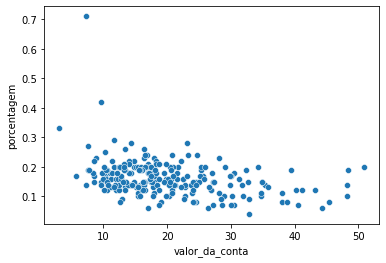

In [45]:
sc_plot = sns.scatterplot(x=tips['valor_da_conta'], y=tips['porcentagem'], data=tips)

Visualmente, o valor da conta não é proporcional ao valor da gorjeta

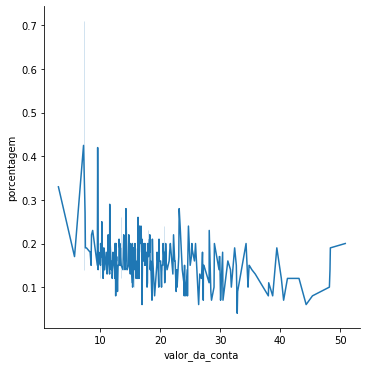

In [44]:
rel_plot = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=tips)

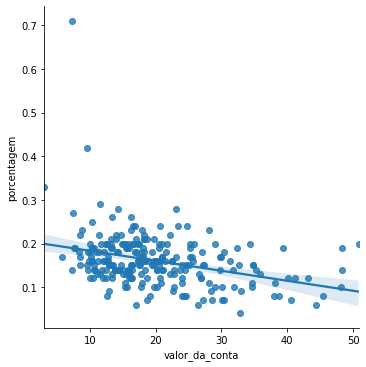

In [43]:
lm_plot = sns.lmplot(x='valor_da_conta', y='porcentagem', data=tips)

In [56]:
sc_plot.figure.suptitle('Valor da conta x Gorjeta')
sc_plot.set_title('Análise do valor da gorjeta em função do valor da conta')
sc_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
sc_plot.get_figure()
sc_plot.get_figure().savefig('imagem.png')

# Análise 2 - Sobremesa

In [58]:
tips.head()

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Janta,2,0.06
1,10.34,1.66,não,Domingo,Janta,3,0.16
2,21.01,3.50,não,Domingo,Janta,3,0.17
3,23.68,3.31,não,Domingo,Janta,2,0.14
4,24.59,3.61,não,Domingo,Janta,4,0.15


In [60]:
tips[tips['sobremesa'] == 'sim'].describe()

,valor_da_conta,tip,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [61]:
tips[tips['sobremesa'] == 'não'].describe()

,valor_da_conta,tip,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


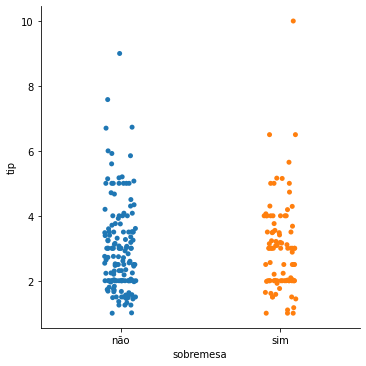

In [64]:
sns.catplot(x='sobremesa', y='tip', data=tips)

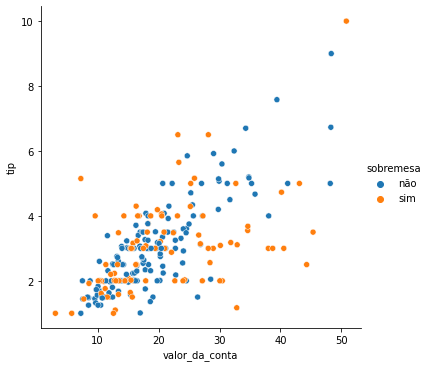

In [66]:
sns.relplot(x='valor_da_conta', y='tip', data=tips, hue='sobremesa')

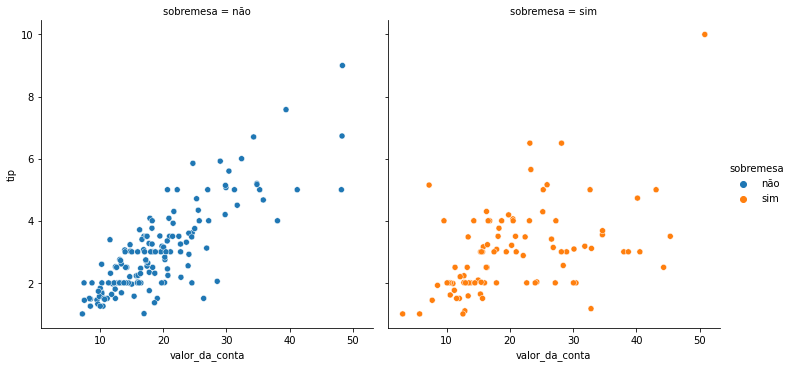

In [67]:
sns.relplot(x='valor_da_conta', y='tip', data=tips, hue='sobremesa', col='sobremesa')

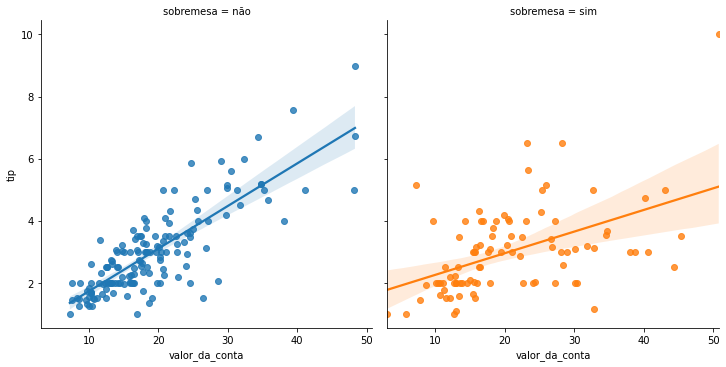

In [68]:
sns.lmplot(x='valor_da_conta', y='tip', col='sobremesa', hue='sobremesa', data=tips)

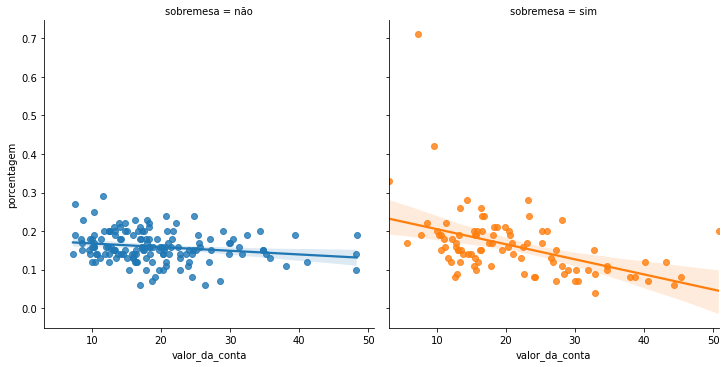

In [69]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=tips)

Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

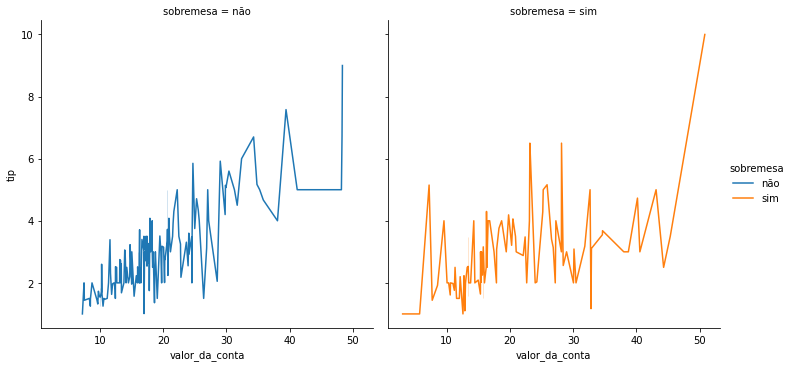

In [70]:
sns.relplot(x='valor_da_conta', y='tip', data=tips, hue='sobremesa', col='sobremesa', kind='line')

## Teste de hipótese

H<sup>null</sup>
> A distribuição da taxa da gorjeta é igual nos dois grupos

H<sup>alt</sup>

> A distribuição da taxa da gorjeta não é igual nos dois grupos

In [71]:
from scipy.stats import ranksums

In [76]:
sobremesa = tips.query("sobremesa == 'sim'").porcentagem

In [75]:
sem_sobremesa = tips.query("sobremesa == 'não'").porcentagem

In [78]:
r = ranksums(sobremesa, sem_sobremesa)

In [80]:
print('O valor do p-value é {}'.format(r.pvalue.round(2)))

O valor do p-value é 0.53


Com este valor para p-value, podemos concluir que a distribuição é igual nos dois grupos

# Análise 3 - Dias da semana

In [82]:
tips.dia_da_semana.unique()

array(['Domingo', 'Sabádo', 'Quinta', 'Sexta'], dtype=object)

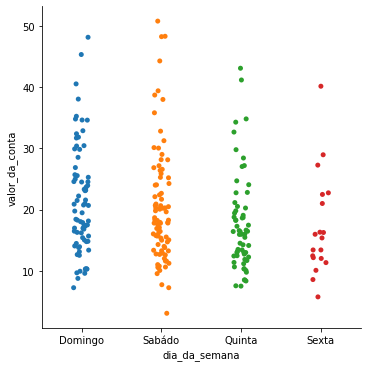

In [83]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=tips)

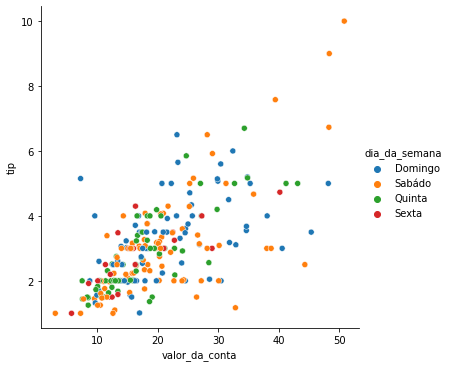

In [84]:
sns.relplot(x='valor_da_conta', y='tip', hue='dia_da_semana', data=tips)

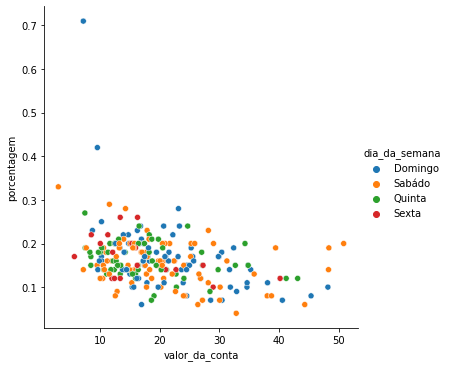

In [85]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=tips)

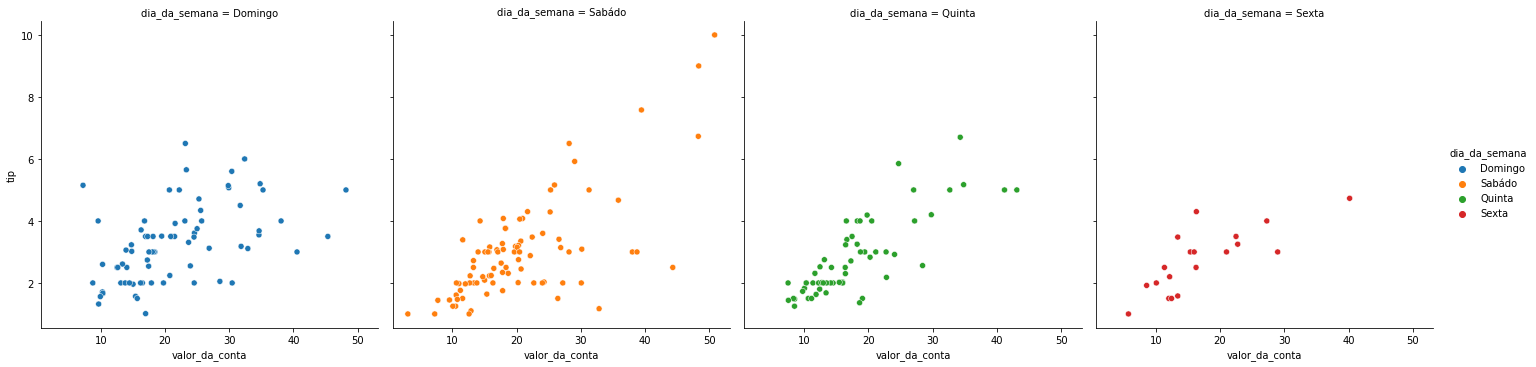

In [86]:
sns.relplot(x='valor_da_conta', y='tip', hue='dia_da_semana', data=tips, col='dia_da_semana')

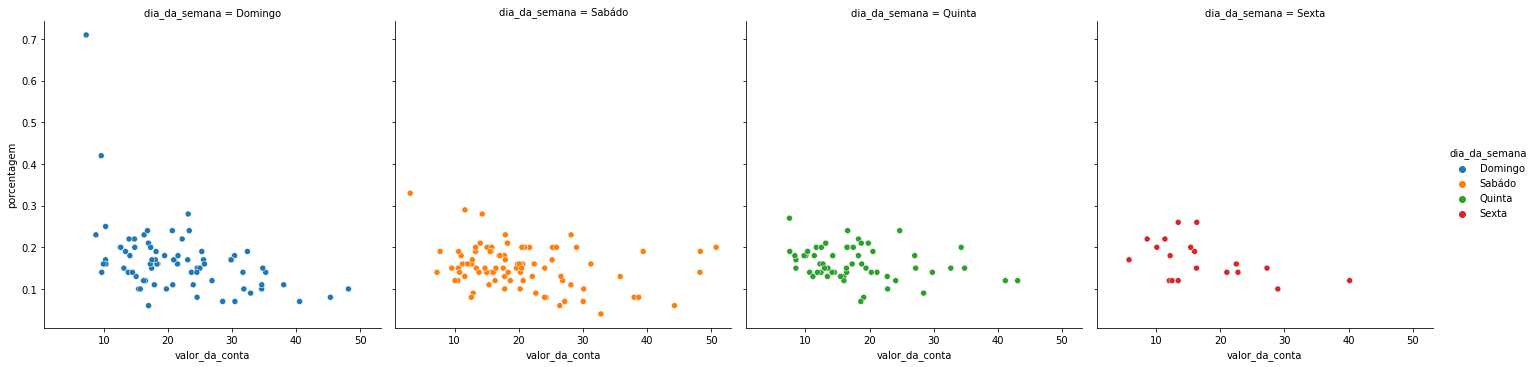

In [87]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=tips, col='dia_da_semana')

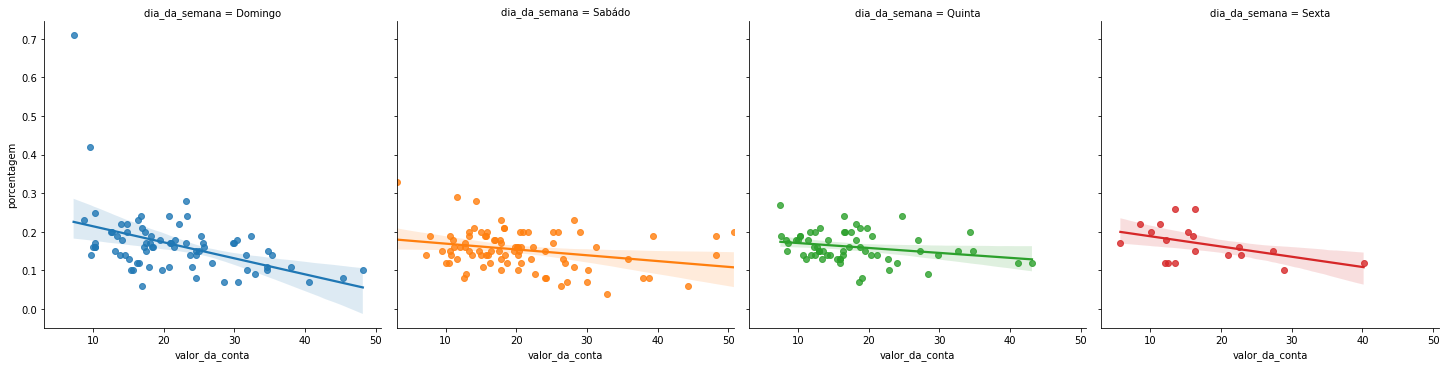

In [88]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=tips, col='dia_da_semana')

In [93]:
print('O valor médio da gorjeta é de {}'.format(tips.tip.mean()))

O valor médio da gorjeta é de 2.9982786885245902


In [96]:
tips.groupby('dia_da_semana').mean()[['valor_da_conta', 'tip', 'porcentagem']]

,valor_da_conta,tip,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabádo,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [98]:
print('Frequência dos dias')
tips.dia_da_semana.value_counts()

Frequência dos dias


Sabádo     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

H<sup>null</sup>

> A distribuição do valor da conta é igual no sábado e no domingo

H<sup>alt</sup>

> A distribuição do valor da conta não é igual no sábado e no domingo

In [107]:
conta_domingo = tips.query("dia_da_semana == 'Domingo'").valor_da_conta

In [106]:
conta_sabado = tips.query("dia_da_semana == 'Sabádo'").valor_da_conta

In [111]:
print('O valor de p é igual a {}'.format(ranksums(conta_domingo, conta_sabado).pvalue))

O valor de p é igual a 0.3576728477868443


Com este valor para p, podemos concluir que a distribuição do valor da conta é igual no sábado e no domingo

# Análise 4 - Hora do dia

In [112]:
tips.head()

,valor_da_conta,tip,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,não,Domingo,Janta,2,0.06
1,10.34,1.66,não,Domingo,Janta,3,0.16
2,21.01,3.50,não,Domingo,Janta,3,0.17
3,23.68,3.31,não,Domingo,Janta,2,0.14
4,24.59,3.61,não,Domingo,Janta,4,0.15


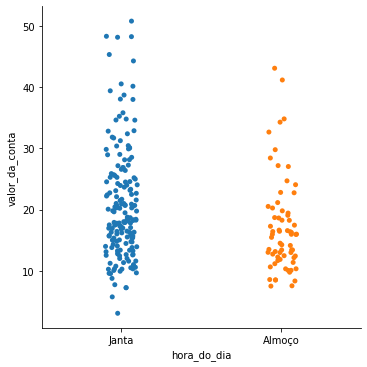

In [113]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=tips)

Visualmente, percebe-se que o valor da conta é maior no horário do almoço

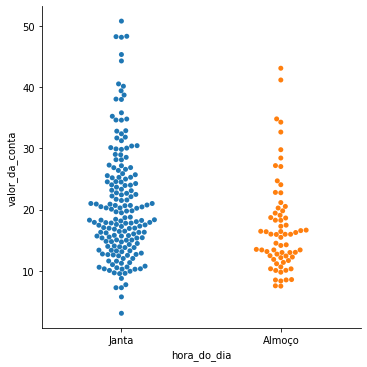

In [114]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=tips, kind='swarm')

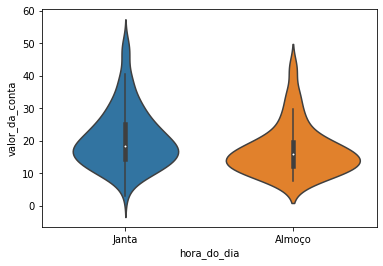

In [115]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=tips)

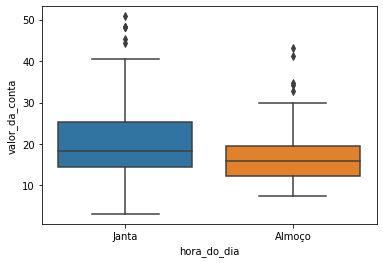

In [116]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=tips)

In [123]:
conta_almoço = tips.query("hora_do_dia == 'Almoço'").valor_da_conta
conta_janta = tips.query("hora_do_dia == 'Janta'").valor_da_conta

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


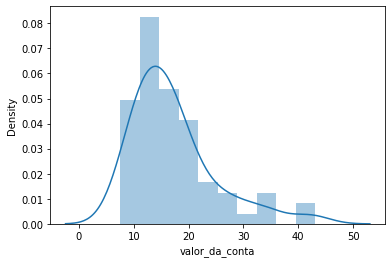

In [128]:
sns.distplot(conta_almoço)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


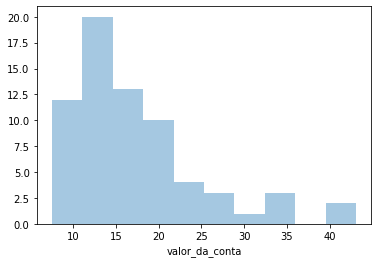

In [125]:
sns.distplot(conta_almoço, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


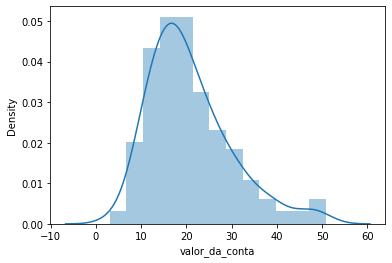

In [129]:
sns.distplot(conta_janta)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


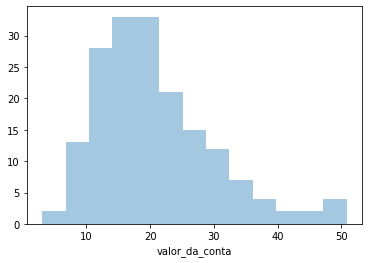

In [127]:
sns.distplot(conta_janta, kde=False)

In [131]:
tips.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'tip', 'porcentagem']]

,valor_da_conta,tip,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Janta,20.797159,3.102670,0.159773


## Teste de hipotése

H<sup>null</sup>

> A distribuição do valor da conta do almoço e da janta é a mesma

H<sup>alt</sup>

> A distribuição do valor da conta no almoço e da janta são diferentes

In [138]:
r3 = ranksums(conta_janta, conta_almoço)

In [139]:
print('O p-value é igual a {}'.format(r3.pvalue))

O p-value é igual a 0.0011791039723641672


H<sup>alt</sup>

> A distribuição do valor da conta no almoço e da janta são diferentes

In [141]:
pct_almoco = tips.query("hora_do_dia == 'Almoço'").porcentagem
pct_janta = tips.query("hora_do_dia == 'Janta'").porcentagem

H<sup>null</sup>

> A distribuição da taxa da gorjeta são iguais no almoço e na janta

H<sup>alt</sup>

> A distribuição da taxa da gorjeta são diferentes no almoço e na janta

In [143]:
r4 = ranksums(pct_almoco, pct_janta)

In [144]:
print('O p-value é igual a {}'.format(r4.pvalue))

O p-value é igual a 0.2602493995587126


H<sup>null</sup>

> A distribuição da taxa da gorjeta são iguais no almoço e na janta